Step 1 函数库倒入

In [166]:
##  基础函数库
import numpy as np 
import pandas as pd

## 绘图函数库
import matplotlib.pyplot as plt
import seaborn as sns

Step2：数据读取/载入

In [167]:
# 加载数据
data = pd.read_csv(r"case2_training.csv")
test = pd.read_csv(r"case2_testing.csv", dtype=float)

Step3：数据信息简单查看

In [168]:
# 观察数据
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           50000 non-null  int64  
 1   Region       50000 non-null  int64  
 2   Date         50000 non-null  int64  
 3   Weekday      50000 non-null  int64  
 4   Apartment    50000 non-null  int64  
 5   Beds         50000 non-null  int64  
 6   Review       50000 non-null  float64
 7   Pic Quality  50000 non-null  float64
 8   Price        50000 non-null  float64
 9   Accept       50000 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 3.8 MB


In [169]:
data

,ID,Region,Date,Weekday,Apartment,Beds,Review,Pic Quality,Price,Accept
0,1,4,32,5,1,1,4.526975,0.739994,230.552998,0
1,2,2,87,4,1,1,4.548455,0.862642,348.203425,0
2,3,5,277,5,1,2,4.965732,0.515548,430.462327,0
3,4,3,246,2,1,1,4.752735,0.561547,149.305433,1
4,5,1,155,2,1,2,3.890960,0.817142,165.264184,1
...,...,...,...,...,...,...,...,...,...,...
49995,49996,1,68,6,0,1,3.669174,0.858494,199.187671,1
49996,49997,9,217,1,1,2,4.849890,0.678795,348.927419,0
49997,49998,10,100,3,1,2,4.971527,0.993316,317.187052,1
49998,49999,10,170,3,1,2,4.951120,0.792698,460.453975,0


In [170]:
## 利用value_counts函数查看训练集标签的数量
pd.Series(data['Accept']).value_counts()

Accept
0    36484
1    13516
Name: count, dtype: int64

In [171]:
## 对于特征进行一些统计描述
data.describe()

,ID,Region,Date,Weekday,Apartment,Beds,Review,Pic Quality,Price,Accept
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,25000.500000,5.495460,182.824300,3.99276,0.801840,1.495760,4.509402,0.750261,316.963436,0.27032
std,14433.901067,2.862611,105.653134,2.00837,0.398617,0.693189,0.460287,0.193746,92.644791,0.44413
min,1.000000,1.000000,1.000000,1.00000,0.000000,1.000000,3.000000,0.036809,80.000000,0.00000
25%,12500.750000,3.000000,91.000000,2.00000,1.000000,1.000000,4.306552,0.630497,251.637842,0.00000
50%,25000.500000,5.000000,183.000000,4.00000,1.000000,1.000000,4.652005,0.794165,315.334386,0.00000
75%,37500.250000,8.000000,274.000000,6.00000,1.000000,2.000000,4.855238,0.908876,378.920370,1.00000
max,50000.000000,10.000000,365.000000,7.00000,1.000000,4.000000,4.999996,0.999985,726.527643,1.00000


Step4:可视化描述

为了方便，我们先纪录数字特征与非数字特征：

In [172]:
numerical_features = [x for x in data.columns if data[x].dtype == np.float or int]

category_features = [x for x in data.columns if data[x].dtype != np.float and int and x != 'Accept']

C:\Users\Venti\AppData\Local\Temp/ipykernel_3848/65013646.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numerical_features = [x for x in data.columns if data[x].dtype == np.float or int]
C:\Users\Venti\AppData\Local\Temp/ipykernel_3848/65013646.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  category_features = [x for x in data.

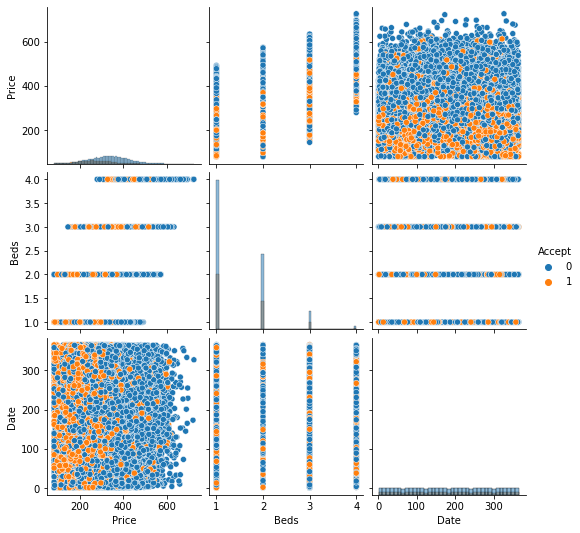

In [186]:
## 选取2个特征与标签组合的散点可视化
sns.pairplot(data=data[['Price',
'Beds',"Date"] + ['Accept']], diag_kind='hist', hue= 'Accept')
plt.figsize=(15,15)
plt.show()

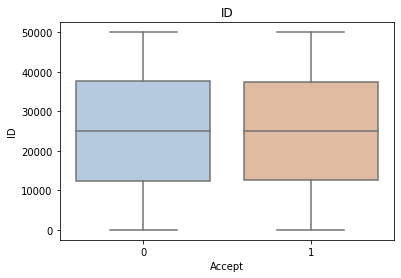

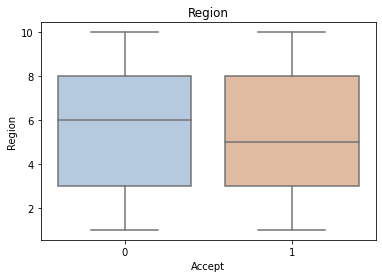

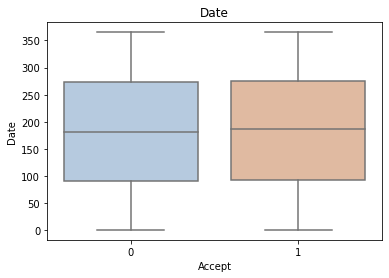

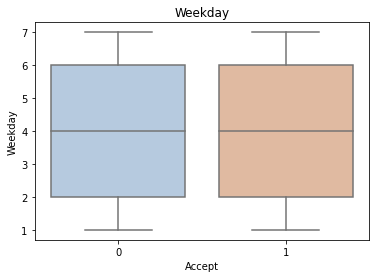

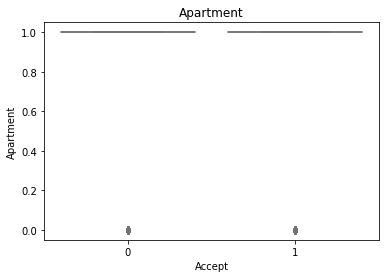

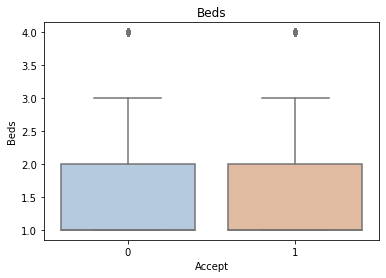

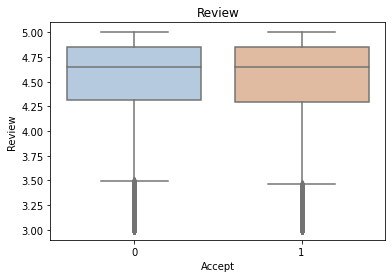

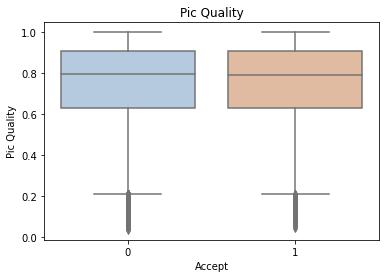

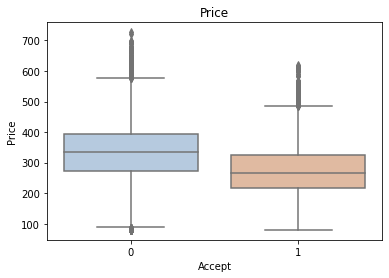

In [174]:
for col in data[numerical_features].columns:
    if col != 'Accept':
        sns.boxplot(x='Accept', y=col, saturation=0.5, palette='pastel', data=data)
        plt.title(col)
        plt.show()

Step5:对离散变量进行编码

In [175]:
# data = pd.get_dummies(data, columns = ['Region','Beds', 'Weekday'], drop_first=True,dtype=int)
# test = pd.get_dummies(test, columns = ['Region','Beds', 'Weekday'], drop_first=True,dtype=int)

In [176]:
# divide the Date into 7 groups
count=0
for i in data.Date:
    data.loc[count, 'day_3']=1 if 1<=i<=3 else 0
    data.loc[count,'day_7']=1 if 4<=i<=7 else 0
    data.loc[count,'day14']=1 if 8<=i<=14 else 0
    data.loc[count,'day_31']=1 if 15<=i<=31 else 0
    data.loc[count,'day_90']=1 if 32<=i<=90 else 0
    data.loc[count,'day_180']=1 if 91<=i<=180 else 0
    data.loc[count,'day_365']=1 if 181<=i<=365 else 0
    count+=1
data

,ID,Region,Date,Weekday,Apartment,Beds,Review,Pic Quality,Price,Accept,day_3,day_7,day14,day_31,day_90,day_180,day_365
0,1,4,32,5,1,1,4.526975,0.739994,230.552998,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,2,87,4,1,1,4.548455,0.862642,348.203425,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,5,277,5,1,2,4.965732,0.515548,430.462327,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,3,246,2,1,1,4.752735,0.561547,149.305433,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,1,155,2,1,2,3.890960,0.817142,165.264184,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,1,68,6,0,1,3.669174,0.858494,199.187671,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
49996,49997,9,217,1,1,2,4.849890,0.678795,348.927419,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49997,49998,10,100,3,1,2,4.971527,0.993316,317.187052,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49998,49999,10,170,3,1,2,4.951120,0.792698,460.453975,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [177]:
count = 0
for i in test.Date:
    test.loc[count, 'day_3']=1 if 1<=i<=3 else 0
    test.loc[count,'day_7']=1 if 4<=i<=7 else 0
    test.loc[count,'day14']=1 if 8<=i<=14 else 0
    test.loc[count,'day_31']=1 if 15<=i<=31 else 0
    test.loc[count,'day_90']=1 if 32<=i<=90 else 0
    test.loc[count,'day_180']=1 if 91<=i<=180 else 0
    test.loc[count,'day_365']=1 if 181<=i<=365 else 0
    count+=1
test

,ID,Region,Date,Weekday,Apartment,Beds,Review,Pic Quality,Price,day_3,day_7,day14,day_31,day_90,day_180,day_365
0,1.0,1.0,64.0,2.0,1.0,1.0,4.923078,0.683932,284.734165,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,9.0,41.0,7.0,1.0,1.0,4.842211,0.958800,295.051733,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.0,2.0,275.0,3.0,1.0,3.0,4.702331,0.500134,385.070370,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,8.0,323.0,2.0,1.0,1.0,4.388125,0.986082,204.353588,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5.0,3.0,311.0,4.0,0.0,1.0,3.868994,0.652980,285.488105,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996.0,4.0,284.0,5.0,1.0,2.0,3.000000,0.611866,192.158094,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19996,19997.0,10.0,292.0,6.0,1.0,1.0,3.305345,0.953897,229.037124,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19997,19998.0,2.0,295.0,2.0,0.0,1.0,4.971692,0.902279,287.498583,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19998,19999.0,9.0,250.0,6.0,1.0,3.0,3.946708,0.975978,369.307960,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Step6：利用 XGBoost 进行训练与预测

In [178]:
## 为了正确评估模型性能，将数据划分为训练集和测试集，并在训练集上训练模型，在测试集上验证模型性能。
from sklearn.model_selection import train_test_split

## 选择其类别为0和1的样本 （不包括类别为2的样本）
data_target_part = data['Accept']
data_features_part = data.drop(columns=["ID","Accept"])

## 测试集大小为20%， 80%/20%分
x_train, x_test, y_train, y_test = train_test_split(data_features_part, data_target_part, test_size = 0.2, random_state = 2020)

In [179]:
## 导入XGBoost模型
from xgboost.sklearn import XGBClassifier
## 定义 XGBoost模型 
clf = XGBClassifier()
# 在训练集上训练XGBoost模型
clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

The accuracy of the Logistic Regression is: 0.8251
The accuracy of the Logistic Regression is: 0.7284
The accuracy of the Logistic Regression is: 0.7330709110616691
The accuracy of the Logistic Regression is: 0.6095004548490932
The confusion matrix result:
 [[6335 1782]
 [ 934  949]]


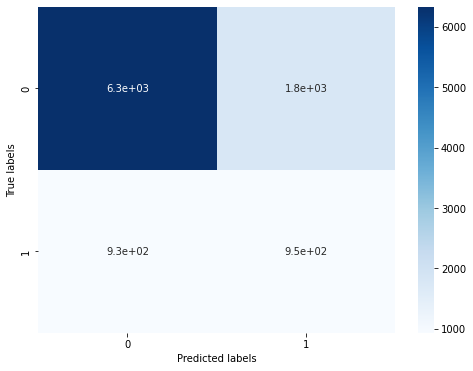

In [180]:
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)
from sklearn import metrics

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

## 利用auc评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.roc_auc_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.roc_auc_score(y_test,test_predict))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Step7: 利用 XGBoost 进行特征选择

<Axes: >

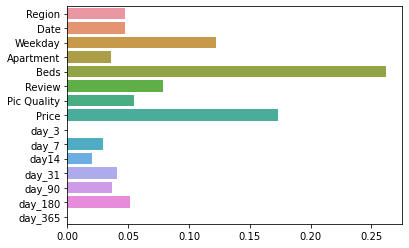

In [181]:
sns.barplot(y=data_features_part.columns, x=clf.feature_importances_)

In [182]:
# 初次之外，我们还可以使用XGBoost中的下列重要属性来评估特征的重要性。

# weight:是以特征用到的次数来评价
# gain:当利用特征做划分的时候的评价基尼指数
# cover:利用一个覆盖样本的指标二阶导数（具体原理不清楚有待探究）平均值来划分。
# total_gain:总基尼指数
# total_cover:总覆盖

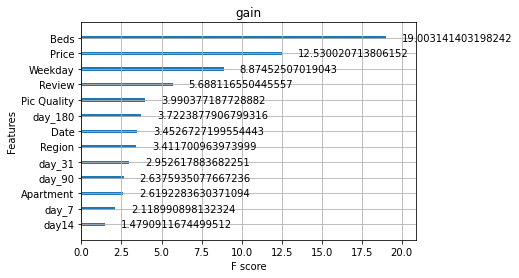

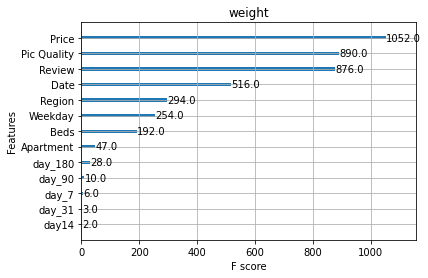

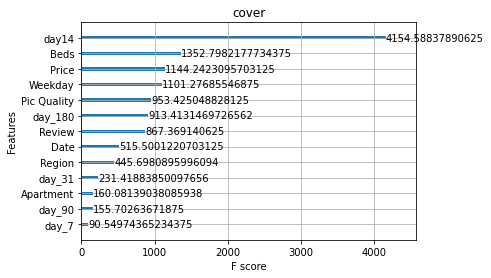

<Figure size 1080x1080 with 0 Axes>

acc= 0.7284


In [183]:
from sklearn.metrics import accuracy_score
from xgboost import plot_importance

def estimate(model,data):
   
    #sns.barplot(data.columns,model.feature_importances_)
    ax1=plot_importance(model,importance_type="gain")
    ax1.set_title('gain')
    ax2=plot_importance(model, importance_type="weight")
    ax2.set_title('weight')
    ax3 = plot_importance(model, importance_type="cover")
    ax3.set_title('cover')
    plt.figure(figsize=(15, 15)) 
    plt.show()
def classes(data,label,test):
    model=XGBClassifier()
    model.fit(data,label)
    ans=model.predict(test)
    estimate(model, data)
    return ans

ans=classes(x_train,y_train,x_test)
pre=accuracy_score(y_test, ans)
print('acc=',accuracy_score(y_test,ans))

Step8: 通过调整参数获得更好的效果

In [150]:
## 从sklearn库中导入网格调参函数
from sklearn.model_selection import GridSearchCV

## 定义参数取值范围
# learning_rate = [0.1, 0.3, 0.6]
# subsample = [0.8, 0.9]
# colsample_bytree = [0.6, 0.8]
max_depth = list(range(4,9))
min_child_weight = list((1,3,6))

parameters = { 'max_depth': max_depth,
              'min_child_weight': min_child_weight,
              'learning_rate': [0.1],
              'subsample': [0.7],
              'colsample_bytree': [0.6]}
model = XGBClassifier(n_estimators = 50)

## 进行网格搜索
clf = GridSearchCV(model, parameters, cv=3, scoring='roc_auc',verbose=1,n_jobs=-1)
clf = clf.fit(x_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


In [151]:
## 网格搜索后的最好参数为
clf.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 3,
 'subsample': 0.7}

In [152]:
parameters = { 'max_depth': [6],
              'min_child_weight': [6],
              'learning_rate': [0.1],
              'subsample': [0.7],
              'colsample_bytree': [0.6],
              'gamma':[ 0.1 * i for i in range(0,5)]}
model = XGBClassifier(n_estimators = 50)

## 进行网格搜索
clf = GridSearchCV(model, parameters, cv=3, scoring='roc_auc',verbose=1,n_jobs=-1)
clf = clf.fit(x_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [153]:
## 网格搜索后的最好参数为
clf.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0.30000000000000004,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 6,
 'subsample': 0.7}

In [154]:
parameters = { 'max_depth': [6],
              'min_child_weight': [6],
              'learning_rate': [0.1],
              'subsample': [ 0.1 * i for i in range(6,9)],
              'colsample_bytree': [0.1 * i for i in range(6,9)],
              'gamma':[0.4]}
model = XGBClassifier(n_estimators = 50)

## 进行网格搜索
clf = GridSearchCV(model, parameters, cv=3, scoring='roc_auc',verbose=1,n_jobs=-1)
clf = clf.fit(x_train, y_train)
clf.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


{'colsample_bytree': 0.8,
 'gamma': 0.4,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 6,
 'subsample': 0.8}

In [155]:
parameters = { 'max_depth': [6],
              'min_child_weight': [6],
              'learning_rate': [0.5,0.4,0.3,0.2,0.1,0.075,0.05,0.04,0.03],
              'subsample': [ 0.7],
              'colsample_bytree': [0.8],
              'gamma':[0.4]}
model = XGBClassifier(n_estimators = 50)

## 进行网格搜索
clf = GridSearchCV(model, parameters, cv=3, scoring='roc_auc',verbose=1,n_jobs=-1)
clf = clf.fit(x_train, y_train)
clf.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


{'colsample_bytree': 0.8,
 'gamma': 0.4,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 6,
 'subsample': 0.7}

The accuracy of the Logistic Regression is: 0.78025
The accuracy of the Logistic Regression is: 0.7377
The accuracy of the Logistic Regression is: 0.6636747956952083
The accuracy of the Logistic Regression is: 0.6090396112885188
The confusion matrix result:
 [[6488 1842]
 [ 781  889]]


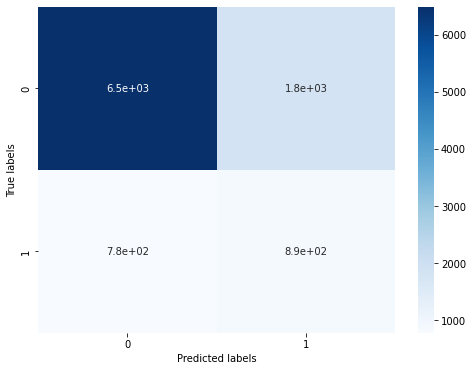

In [156]:
## 在训练集和测试集上分布利用最好的模型参数进行预测

## 定义带参数的 XGBoost模型 
clf = XGBClassifier(colsample_bytree = 0.8, learning_rate = 0.1, max_depth= 6, subsample = 0.7, min_child_weight = 6, gamma = 0.4)
# 在训练集上训练XGBoost模型
clf.fit(x_train, y_train)

train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

## 利用auc【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.roc_auc_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.roc_auc_score(y_test,test_predict))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [157]:
parameters = { 'max_depth': [6],
              'min_child_weight': [6],
              'learning_rate': [0.5,0.4,0.3,0.2,0.1,0.075,0.05,0.04,0.03],
              'subsample': [ 0.7],
              'colsample_bytree': [0.8],
              'gamma':[0.4]}
model = XGBClassifier(n_estimators = 100)

## 进行网格搜索
clf = GridSearchCV(model, parameters, cv=3, scoring='roc_auc',verbose=1,n_jobs=-1)
clf = clf.fit(x_train, y_train)
clf.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


{'colsample_bytree': 0.8,
 'gamma': 0.4,
 'learning_rate': 0.075,
 'max_depth': 6,
 'min_child_weight': 6,
 'subsample': 0.7}

The accuracy of the Logistic Regression is: 0.82885
The accuracy of the Logistic Regression is: 0.7152
The accuracy of the Logistic Regression is: 0.7531565533642601
The accuracy of the Logistic Regression is: 0.6073929714317292
The confusion matrix result:
 [[6142 1721]
 [1127 1010]]


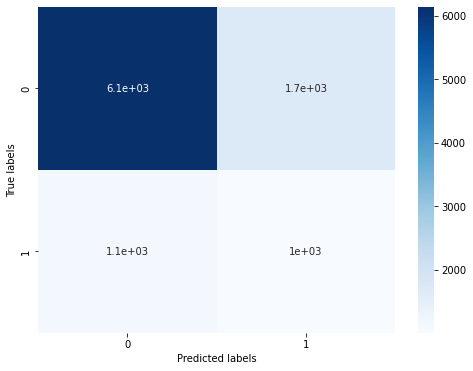

In [162]:
## 在训练集和测试集上分布利用最好的模型参数进行预测

## 定义带参数的 XGBoost模型 
clf = XGBClassifier(n_estimators = 100, colsample_bytree = 0.8, learning_rate = 0.75, max_depth= 6, subsample = 0.7, min_child_weight = 6, gamma = 0.4)
# 在训练集上训练XGBoost模型
clf.fit(x_train, y_train)

train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

## 利用auc【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.roc_auc_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.roc_auc_score(y_test,test_predict))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [159]:
parameters = { 'max_depth': [6],
              'min_child_weight': [6],
              'learning_rate': [0.5,0.4,0.3,0.2,0.1,0.075,0.05,0.04,0.03],
              'subsample': [ 0.7],
              'colsample_bytree': [0.8],
              'gamma':[0.4]}
model = XGBClassifier(n_estimators = 200)

## 进行网格搜索
clf = GridSearchCV(model, parameters, cv=3, scoring='roc_auc',verbose=1,n_jobs=-1)
clf = clf.fit(x_train, y_train)
clf.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


{'colsample_bytree': 0.8,
 'gamma': 0.4,
 'learning_rate': 0.04,
 'max_depth': 6,
 'min_child_weight': 6,
 'subsample': 0.7}

The accuracy of the Logistic Regression is: 0.776475
The accuracy of the Logistic Regression is: 0.7332
The accuracy of the Logistic Regression is: 0.6515854950004963
The accuracy of the Logistic Regression is: 0.597600530616137
The confusion matrix result:
 [[6516 1915]
 [ 753  816]]


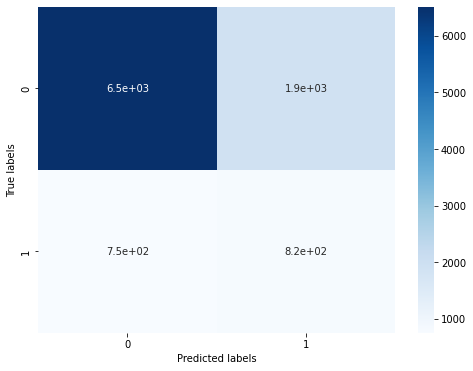

In [160]:
## 在训练集和测试集上分布利用最好的模型参数进行预测

## 定义带参数的 XGBoost模型 
clf = XGBClassifier(n_estimators = 200, colsample_bytree = 0.8, learning_rate = 0.04, max_depth= 6, subsample = 0.7, min_child_weight = 6, gamma = 0.4)
# 在训练集上训练XGBoost模型
clf.fit(x_train, y_train)

train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

## 利用auc【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.roc_auc_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.roc_auc_score(y_test,test_predict))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [163]:
## 定义参数取值范围
learning_rate = [0.1, 0.3, 0.6]
subsample = [0.8, 0.9]
colsample_bytree = [0.6, 0.8]
max_depth = [3,5,8]

parameters = { 'learning_rate': learning_rate,
              'subsample': subsample,
              'colsample_bytree':colsample_bytree,
              'max_depth': max_depth}
model = XGBClassifier(n_estimators = 50)

## 进行网格搜索
clf = GridSearchCV(model, parameters, cv=3, scoring='roc_auc',verbose=1,n_jobs=-1)
clf = clf.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [164]:
## 网格搜索后的最好参数为
clf.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.3,
 'max_depth': 3,
 'subsample': 0.8}

The accuracy of the Logistic Regression is: 0.757925
The accuracy of the Logistic Regression is: 0.733
The accuracy of the Logistic Regression is: 0.6357279504474643
The accuracy of the Logistic Regression is: 0.6071782788312844
The confusion matrix result:
 [[6429 1830]
 [ 840  901]]


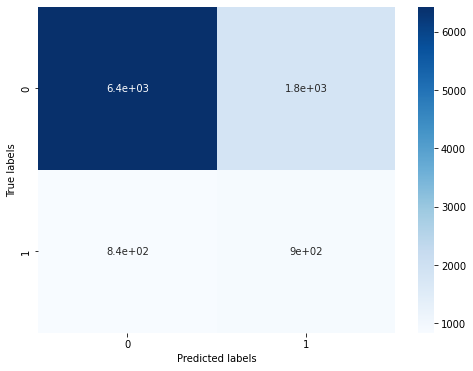

In [165]:
## 在训练集和测试集上分布利用最好的模型参数进行预测

## 定义带参数的 XGBoost模型 
clf = XGBClassifier(colsample_bytree = 0.8, learning_rate = 0.3, max_depth= 3, subsample = 0.9)
# 在训练集上训练XGBoost模型
clf.fit(x_train, y_train)

train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

## 利用auc【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.roc_auc_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.roc_auc_score(y_test,test_predict))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()